### 前提条件
- 【目的】
  - センサーにより取得する放電波形から停電に至る前に、停電原因となる放電波形を検出する
- 【センサーデータ】
  - 取得波形は電圧波形であり基本周波数は５０Hz
  - センサーは三相一括で同時に取得

In [1]:
#import_library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#watch_matedata_train.csv
metadata_train = pd.read_csv('metadata_train.csv')
print(metadata_train.shape)
metadata_train.head()

(8712, 4)


,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


 ### metadata_train
   - signal_id: データid
   - id_measurement: 三相一括id
   - hase: 相
   - target: 0=健全　1=異常
   - 異常波形がやたら少ない

In [3]:
# check_null,metadata_train_data
metadata_train.isnull().sum()

signal_id         0
id_measurement    0
phase             0
target            0
dtype: int64

- meta_trainに欠損なし

In [4]:
#watch_matedata_test.csv
metadata_test = pd.read_csv("metadata_test.csv")
print(metadata_test.shape)
metadata_test.head()

(20337, 3)


,signal_id,id_measurement,phase
0,8712,2904,0
1,8713,2904,1
2,8714,2904,2
3,8715,2905,0
4,8716,2905,1


 ### metadata_test
   - signal_id: データid
   - id_measurement: 三相一括id
   - hase: 相
   - targetなし

In [5]:
#watch_sample_submission.csv
sample_submission = pd.read_csv('sample_submission.csv')
print(sample_submission.shape)
sample_submission.head()

(20337, 2)


,signal_id,target
0,8712,0
1,8713,0
2,8714,0
3,8715,0
4,8716,0


- metadata_testのsignal_id, target

In [6]:
# check_null, metadata_test_data
metadata_test.isnull().sum()

signal_id         0
id_measurement    0
phase             0
dtype: int64

In [7]:
#check_null, sample_submission_data
sample_submission.isnull().sum()

signal_id    0
target       0
dtype: int64

- meta_test, sample_subに欠損なし

        signal_id  id_measurement  phase
target                                  
0            8187            8187   8187
1             525             525    525


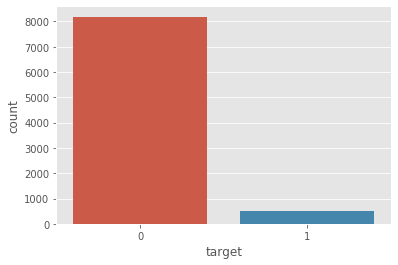

In [8]:
#Aggregate_train_data_target
damage = metadata_train.groupby('target').count()
print(damage)
#plot_traindata_damege_and_nodamege
sns.countplot(x='target', data=metadata_train,)

In [9]:
#count_train_data_target
target_count = metadata_train.target.value_counts()
print('positive(target:0)count:{}'.format(target_count[0]))
print('negative(target:1)count:{}'.format(target_count[1]))

positive(target:0)count:8187
negative(target:1)count:525


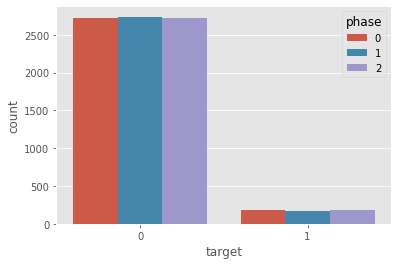

In [10]:
#plot_train_data_target_each_phase
sns.countplot(x="target", data=metadata_train, hue="phase",)

In [11]:
#comparison_target_each_phose
target_0 = metadata_train.groupby(['id_measurement']).sum().query('target == 0')
target_1= metadata_train.groupby(['id_measurement']).sum().query('target != 0')
miss_1 = metadata_train.groupby(['id_measurement']).sum().query('target == 1')
miss_2 = metadata_train.groupby(['id_measurement']).sum().query('target == 2')
miss_3 = metadata_train.groupby(['id_measurement']).sum().query('target == 3')
print('未検出数：' + str(target_0.shape[0]))
print('検出数：' + str(target_1.shape[0]))
print('1相検出：' + str(miss_1.shape[0]))
print('2相検出：' + str(miss_2.shape[0]))
print('3相検出：' + str(miss_3.shape[0]))

未検出数：2710
検出数：194
1相検出：19
2相検出：19
3相検出：156


- ほとんどが３相検出

In [12]:
#watch_train.parquet(wave)_data
import pyarrow.parquet as pq
train_df = pd.read_parquet('train.parquet')
print(train_df.shape)
train_df.head()

/Users/kozimatakanori/anaconda3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/kozimatakanori/anaconda3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/kozimatakanori/anaconda3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


(800000, 8712)


,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,17,-22,12,8,15,8,-18,-14,-8,23


In [13]:
#watch_test.parquet(wave)_data
import pyarrow.parquet as pq
test_df = pd.read_parquet('test.parquet')
print(test_df.shape)
test_df.head()

(800000, 20337)


,8712,8713,8714,8715,8716,8717,8718,8719,8720,8721,...,29039,29040,29041,29042,29043,29044,29045,29046,29047,29048
0,15,-20,3,11,1,-22,-15,-11,20,-7,...,-15,14,-21,4,19,-14,-4,-10,-8,14
1,15,-20,3,11,1,-21,-16,-12,19,-7,...,-15,14,-20,4,20,-14,-5,-10,-8,14
2,14,-21,2,14,2,-20,-14,-9,20,-9,...,-12,14,-19,4,20,-14,-4,-10,-8,14
3,14,-21,2,13,1,-22,-14,-8,22,-7,...,-13,14,-19,5,19,-14,-5,-10,-8,14
4,15,-20,3,11,2,-22,-12,-6,24,-8,...,-17,14,-20,4,19,-14,-5,-10,-8,15


In [14]:
#transfrom_metadata_train_matrix
metadata_train = metadata_train.T
print(metadata_train.shape)
metadata_train.head()

(4, 8712)


,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
signal_id,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
id_measurement,0,0,0,1,1,1,2,2,2,3,...,2900,2901,2901,2901,2902,2902,2902,2903,2903,2903
phase,0,1,2,0,1,2,0,1,2,0,...,2,0,1,2,0,1,2,0,1,2
target,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'nodamage')

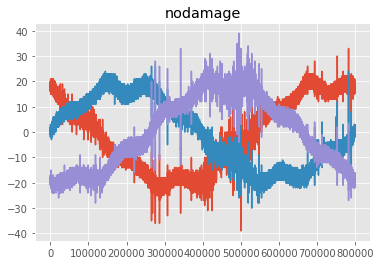

In [15]:
#check_train_data_wave(nodamege)
plt.plot(train_df.iloc[ : ,  :3])
plt.title('nodamage')

Text(0.5, 1.0, 'damege')

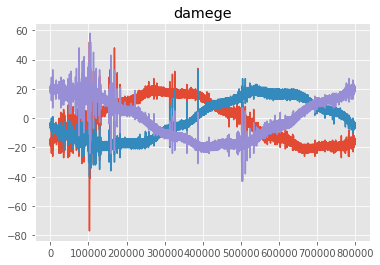

In [16]:
#check_train_data_wave(damege)
plt.plot(train_df.iloc[: , 3:6])
plt.title('damege')

- とりあえずnodamageとdamage波形確認
- 見た目では変化はあまりない

In [17]:
#pick_meta_data_each_target
metadata_train = metadata_train.T
nodamege_index = metadata_train.query("target == 0 ").head(12).index.values
damege_index = metadata_train.query("target == 1 ").head(12).index.values

In [18]:
#check_index_damege_and_nodamege
print(damege_index)
print(nodamege_index)

[  3   4   5 201 202 228 229 230 270 271 272 279]
[ 0  1  2  6  7  8  9 10 11 12 13 14]


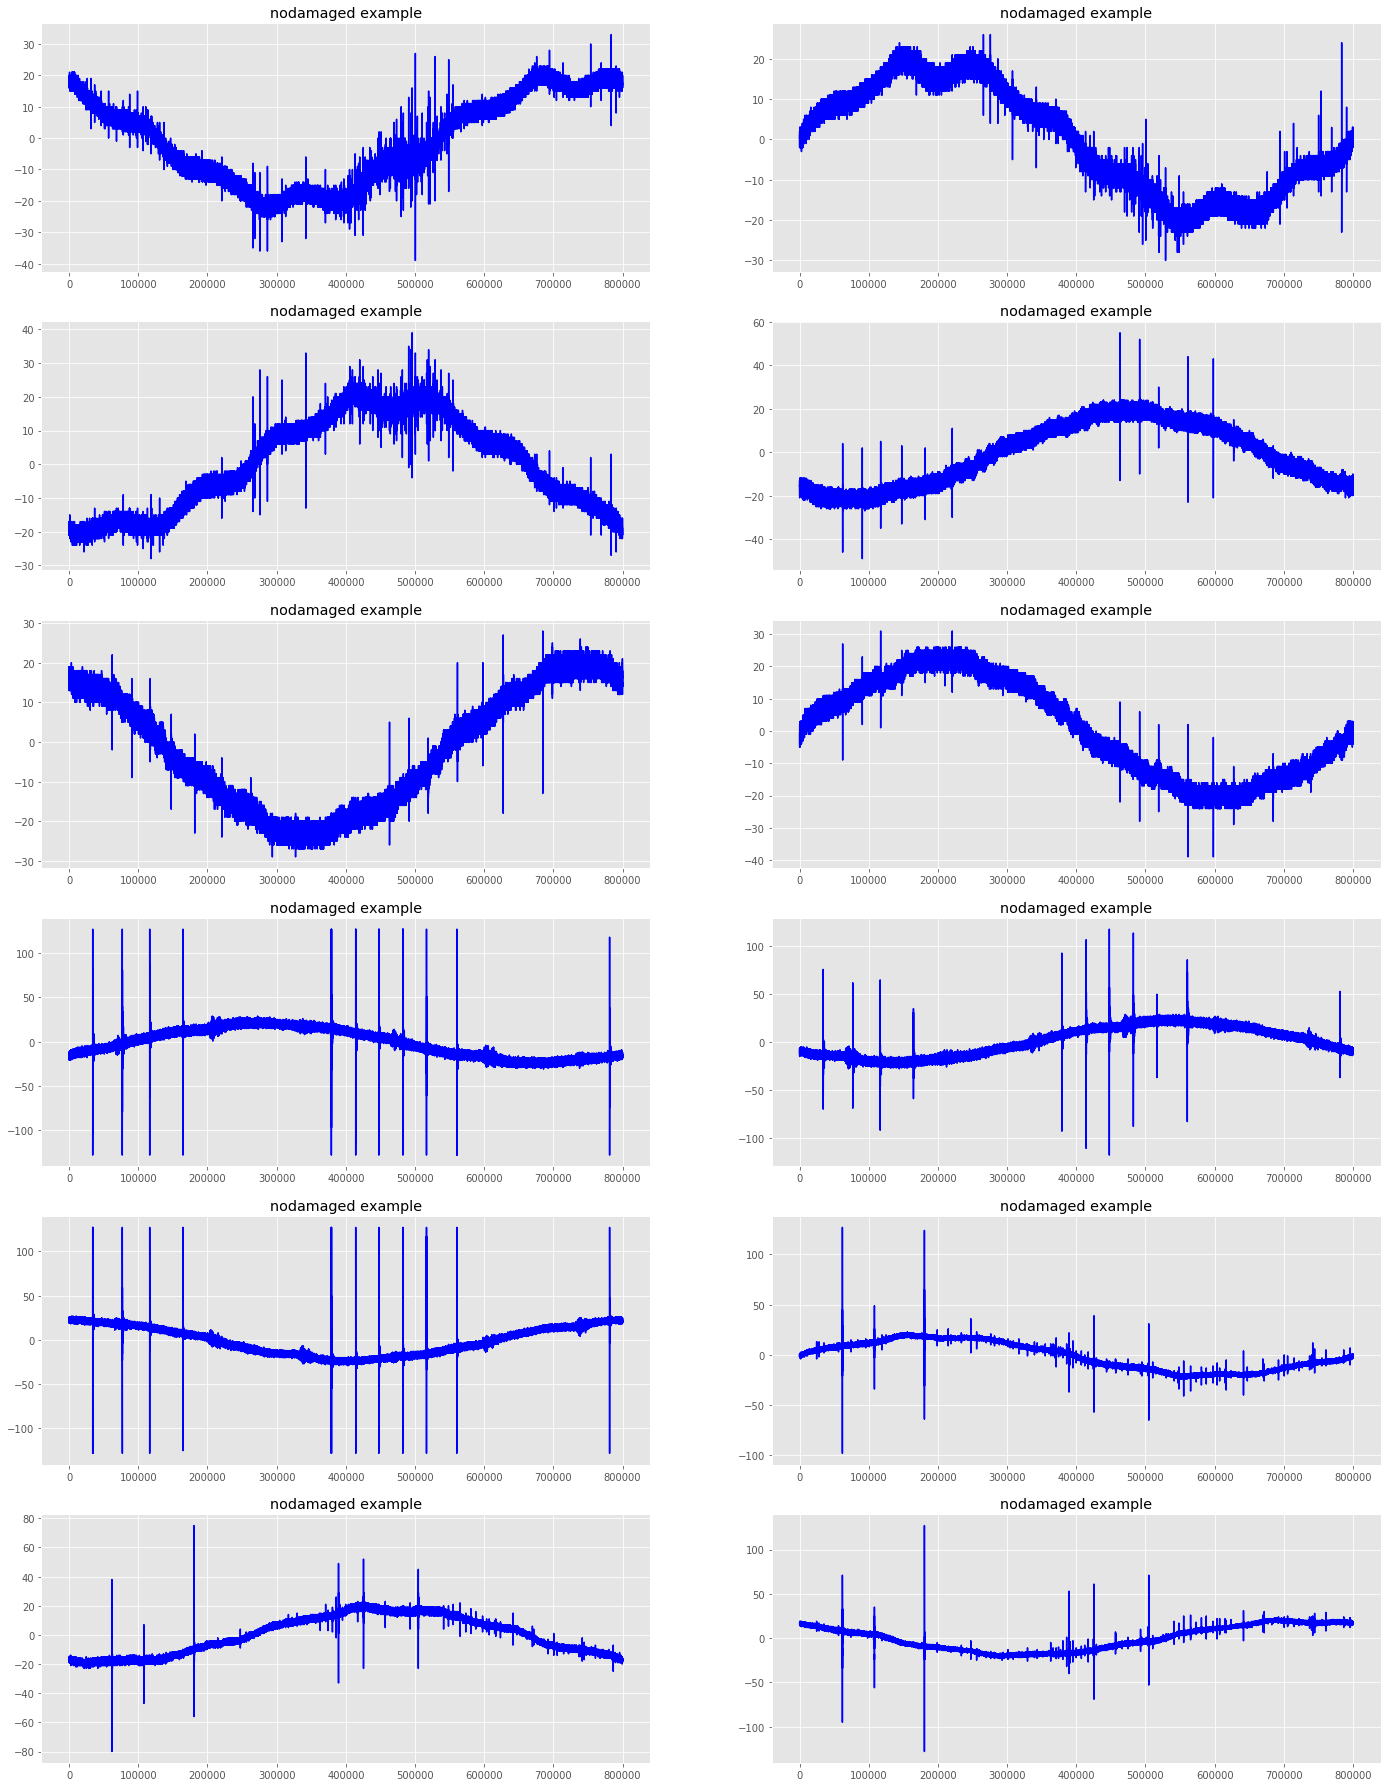

In [19]:
#more_plot_train_data_wave(nodamege)
xsize = 12.0
ysize = 16.0
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(2.0*xsize, 2.0*ysize)
axes = axes.flatten()

for index, neg in enumerate(nodamege_index):
    axes[index].plot(train_df.iloc[: , neg].values, linestyle="solid", color='blue')
    axes[index].set_title("nodamaged example")

plt.show()

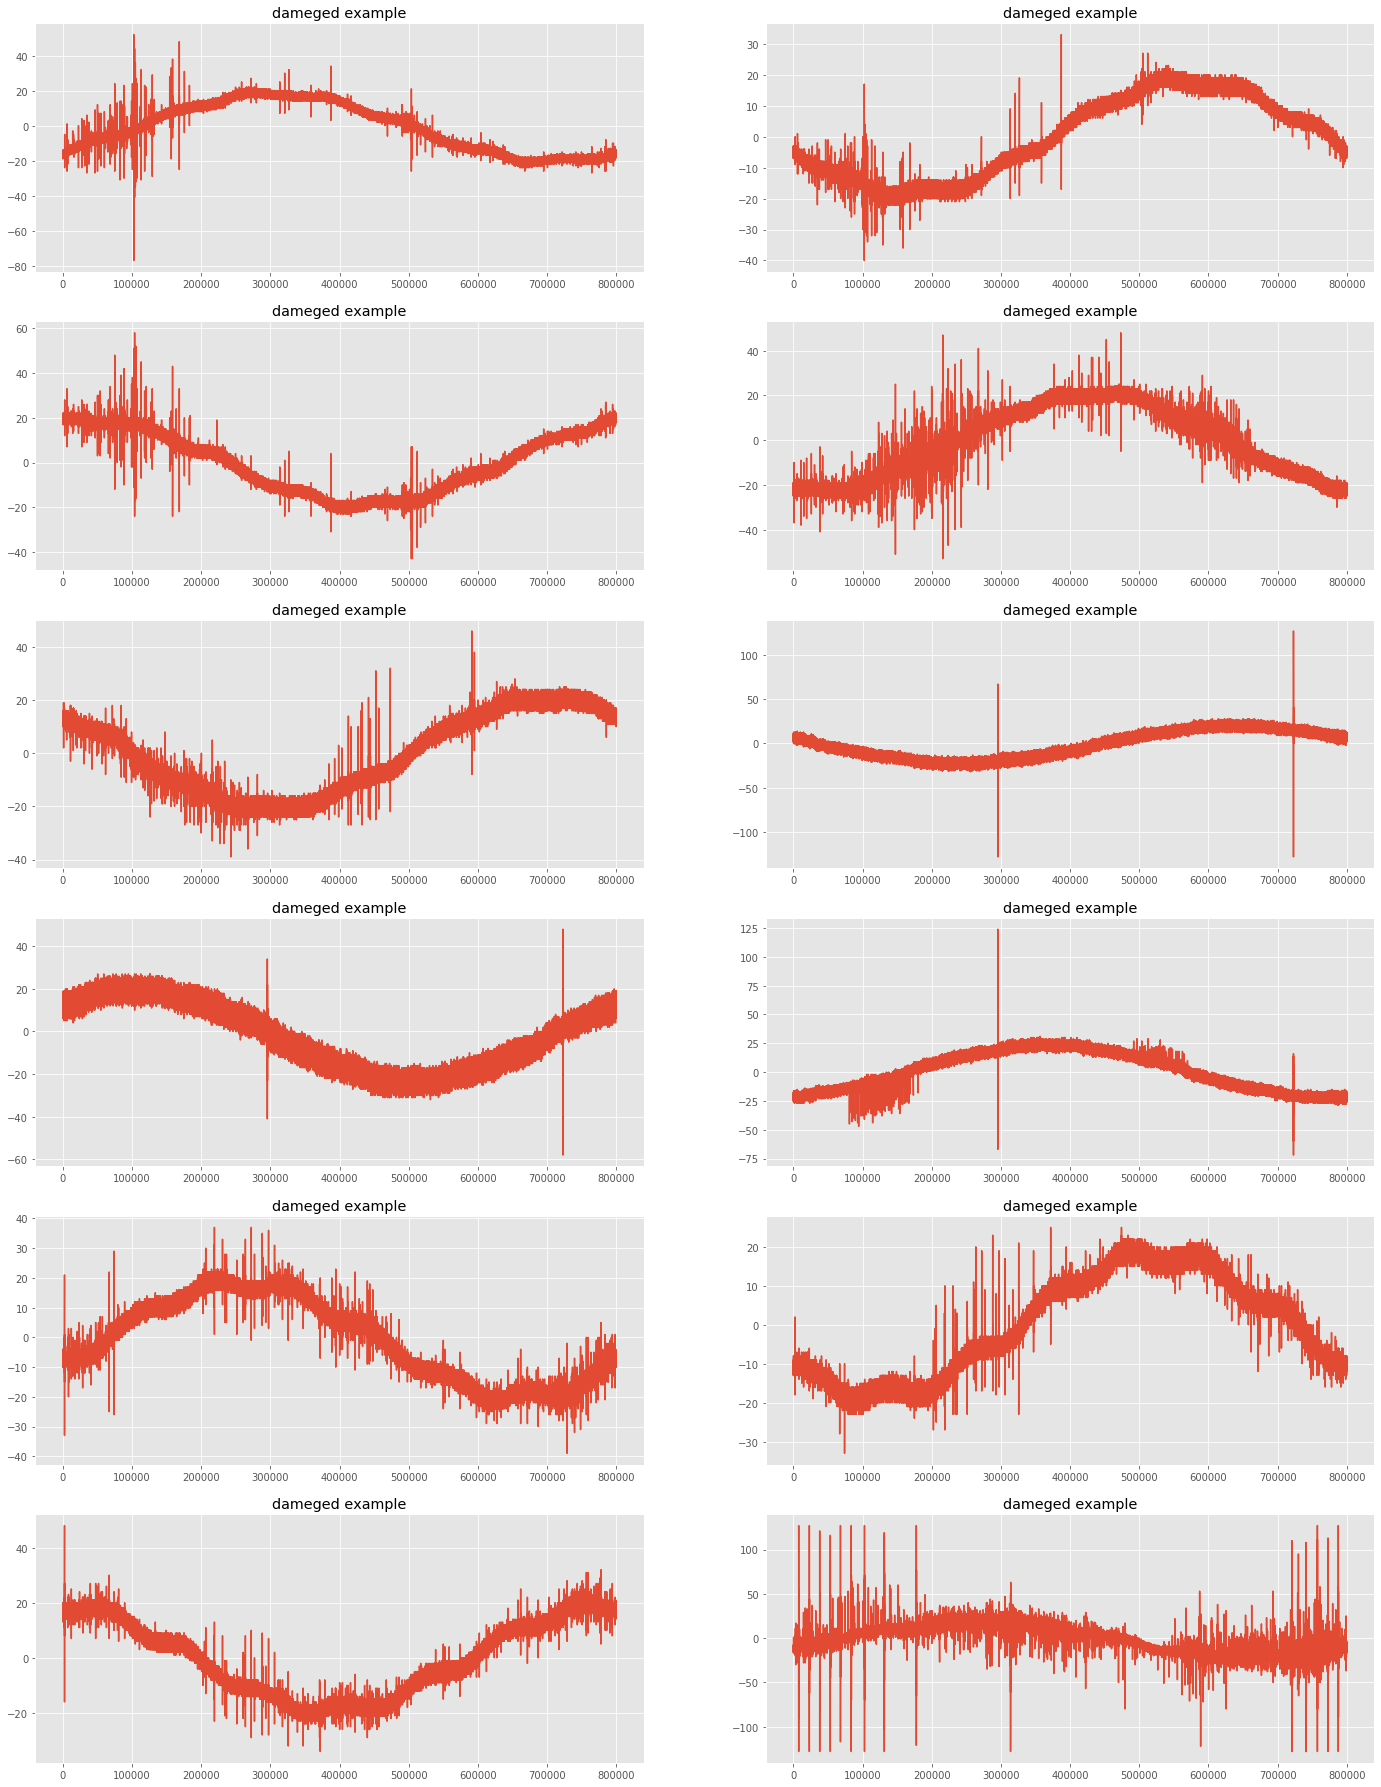

In [20]:
#more_plot_train_data_wave(damege)
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(2.0*xsize, 2.0*ysize)
axes = axes.flatten()
    
for index, pos in enumerate(damege_index):
    axes[index].plot(train_df.iloc[: , pos].values, linestyle="solid")
    axes[index].set_title("dameged example")

plt.show()

###  FFT Transform

(0, 20.376589247684965)

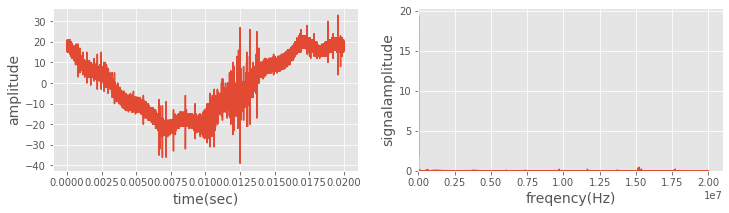

In [83]:
#train_data_test_FFT_and_check_frequency(nodamege)
sample_number = 800000#サンプル数
sample_frequency= 0.000000025#サンプル周波数
sample_time= np.arange(0, sample_number * sample_frequency, sample_frequency) #データ時間
pick_wave_data = train_df['0'].values#波形データの選択

transform_fft = np.fft.fft(pick_wave_data) #FFT変換

absolute_fft = np.abs(transform_fft)#FFT変換値を絶対値する

amplitude_fft = absolute_fft / sample_number * 2

frequency_axis= np.linspace(0, 1/sample_frequency,sample_number) 

fig = plt.figure(figsize=(12, 3))

ax1 = fig.add_subplot(121)
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(sample_time, pick_wave_data)

ax2 = fig.add_subplot(122)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('signalamplitude', fontsize=14)
plt.plot(frequency_axis[:int(sample_number/2)+1], amplitude_fft[:int(sample_number/2)+1]) # ナイキスト定数まで表示
ax2.set_xlim(0, )
ax2.set_ylim(0, )

(0, 20.203019303921604)

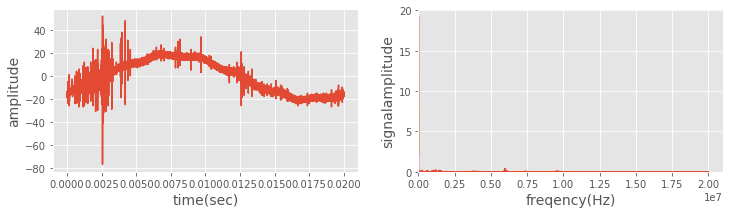

In [84]:
#train_data_test_FFT_and_check_frequency(damege)
sample_number = 800000#サンプル数
sample_frequency= 0.000000025#サンプル周波数
sample_time= np.arange(0, sample_number * sample_frequency, sample_frequency) #データ時間
pick_wave_data = train_df['3'].values#波形データの選択

transform_fft = np.fft.fft(pick_wave_data) #FFT変換

absolute_fft = np.abs(transform_fft)#FFT変換値を絶対値する

amplitude_fft = absolute_fft / sample_number * 2

frequency_axis= np.linspace(0, 1/sample_frequency,sample_number) 

fig = plt.figure(figsize=(12, 3))

ax1 = fig.add_subplot(121)
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(sample_time, pick_wave_data)

ax2 = fig.add_subplot(122)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('signalamplitude', fontsize=14)
plt.plot(frequency_axis[:int(sample_number/2)+1], amplitude_fft[:int(sample_number/2)+1]) # ナイキスト定数まで表示
ax2.set_xlim(0, )
ax2.set_ylim(0, )


### more check FFT

In [85]:
nodamege_index = metadata_train.query("target == 0 ").head(12).index.values
damege_index = metadata_train.query("target == 1 ").head(12).index.values

In [86]:
sample_number = 800000#サンプル数
sample_frequency= 0.000000025#サンプル周波数
sample_time= np.arange(0, sample_number * sample_frequency, sample_frequency) #データ時間
frequency_axis= np.linspace(0, 1/sample_frequency,sample_number) 

def FFT_transform(fft):
    pick_wave_data = train_df[str(fft)].values#波形データの選択
    transform_fft = np.fft.fft(pick_wave_data) #FFT変換
    absolute_fft = np.abs(transform_fft)#FFT変換値を絶対値する
    amplitude_fft = absolute_fft / sample_number * 2
    return amplitude_fft

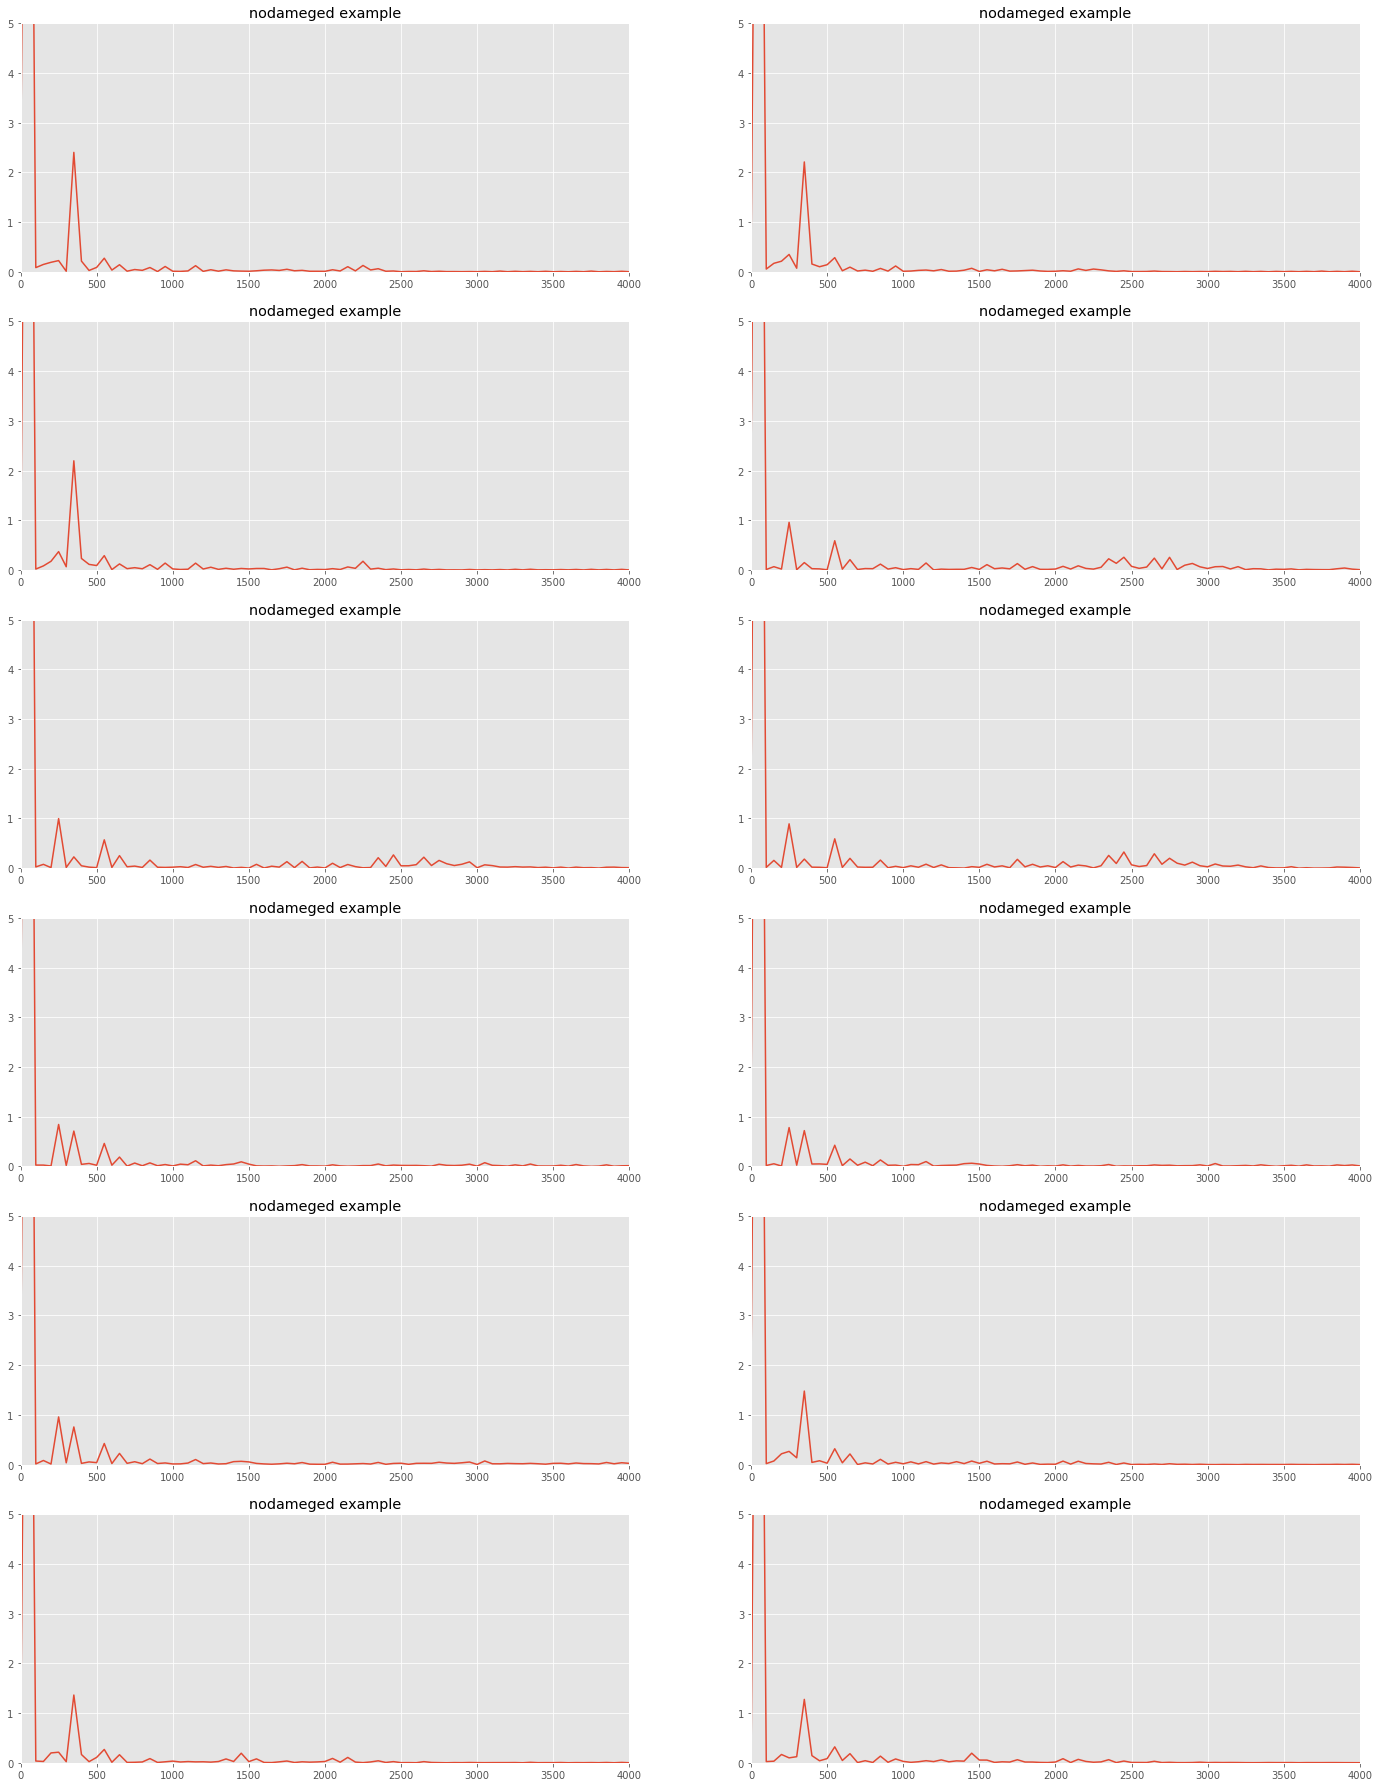

In [106]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(2.0*xsize, 2.0*ysize)
axes = axes.flatten()

for index, fft in enumerate(nodamege_index):
    axes[index].plot(frequency_axis[:int(sample_number/2)+1],
                     FFT_transform(fft)[:int(sample_number/2)+1], 
                     linestyle="solid")
    axes[index].set_title("nodameged example")
    axes[index].set_xlim(0, 4000)
    axes[index].set_ylim(0, 5)

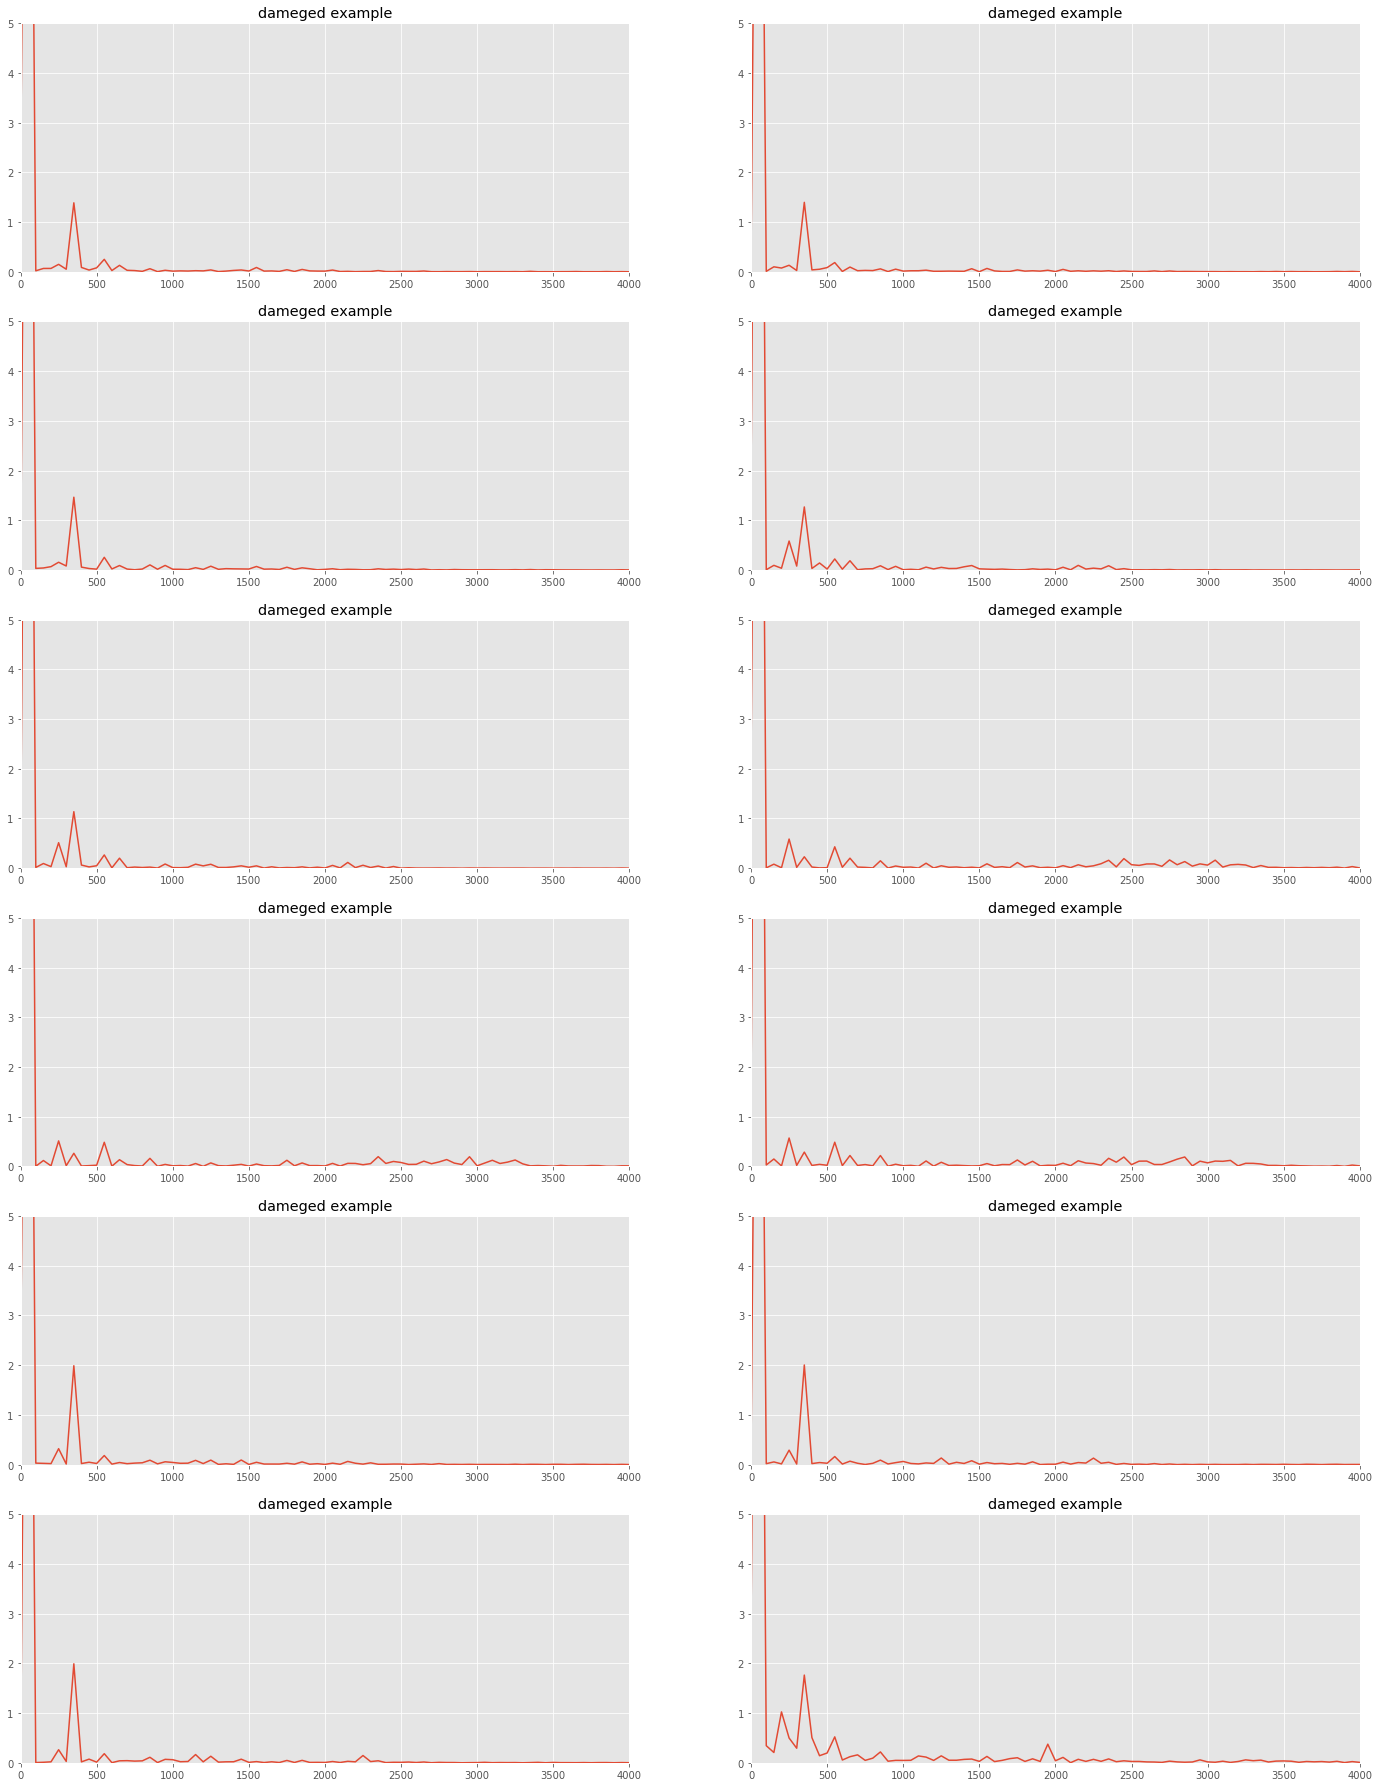

In [105]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(2.0*xsize, 2.0*ysize)
axes = axes.flatten()

for index, fft in enumerate(damege_index):
    axes[index].plot(frequency_axis[:int(sample_number/2)+1],
                     FFT_transform(fft)[:int(sample_number/2)+1], 
                     linestyle="solid")
    axes[index].set_title("dameged example")
    axes[index].set_xlim(0, 4000)
    axes[index].set_ylim(0, 5)